# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import animation
 

%matplotlib notebook

<IPython.core.display.Javascript object>


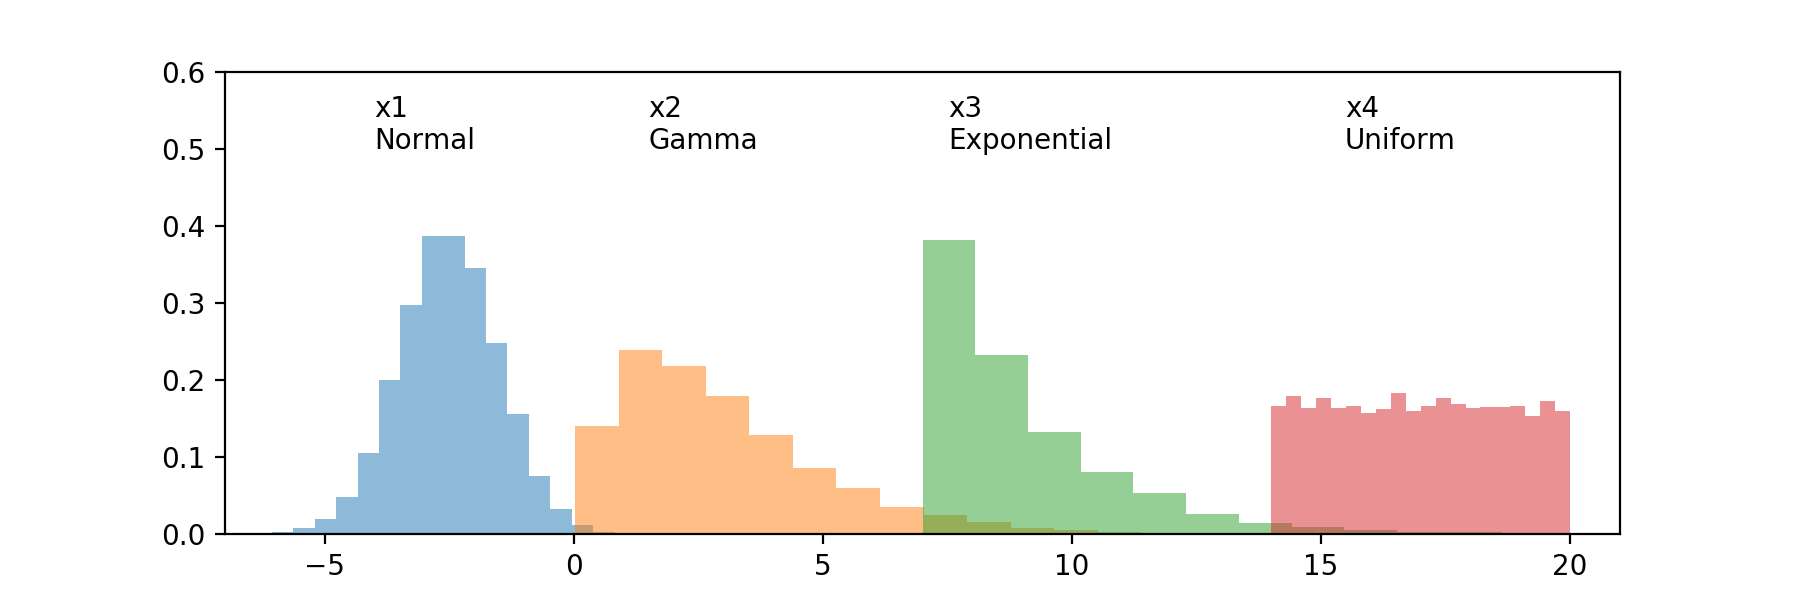

In [14]:
# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, density=True, bins=20, alpha=0.5)
plt.hist(x2, density=True, bins=20, alpha=0.5)
plt.hist(x3, density=True, bins=20, alpha=0.5)
plt.hist(x4, density=True, bins=20, alpha=0.5)
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

plt.show()

In [15]:
def update(cur, ax, x, name, color):
    ax.cla()
    ax.hist(x[:100*cur], density=True, bins=20, color=color, alpha=0.5)
    ax.set_title(f'Sampling the {name} Distribution')
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Value')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

In [16]:
def update_all(cur, axes, xs, names, colors, annotate=False):
    for ax, x, n, c in zip(axes, xs, names, colors):
        update(cur, ax, x, n, c)
        if annotate:
            ax.annotate(f'n={100*(cur+1)}', (0.05, 0.9), xycoords='axes fraction')

<IPython.core.display.Javascript object>


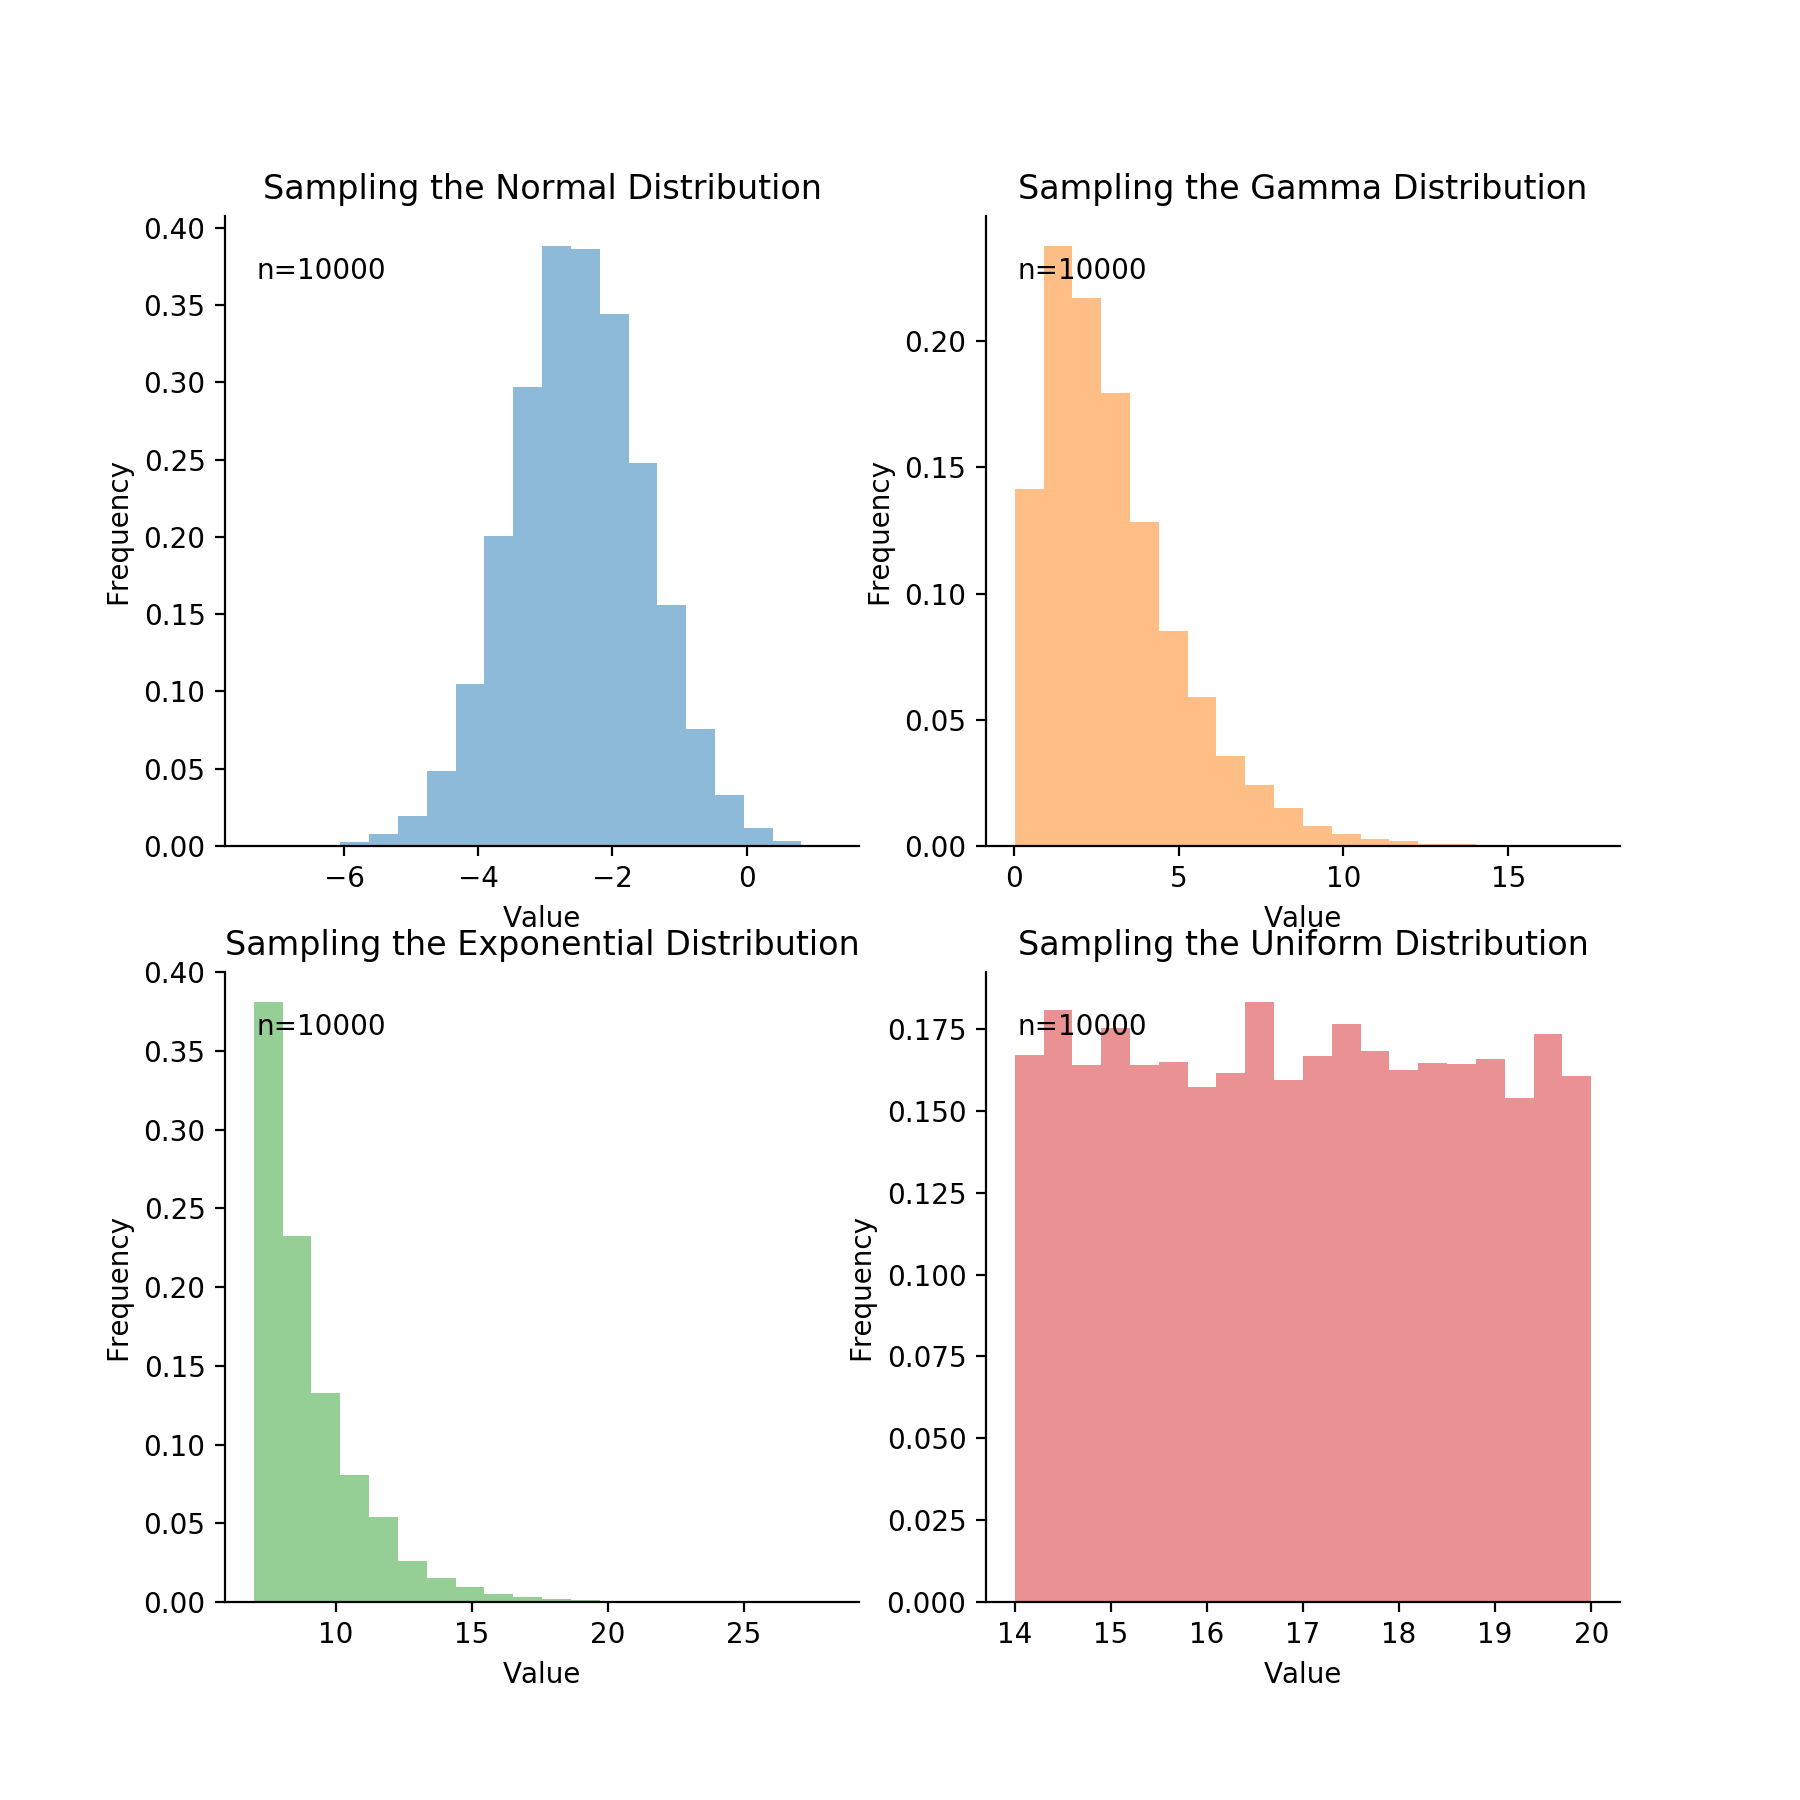

In [18]:
fig = plt.figure(figsize=(9, 9))
axes = fig.subplots(2, 2)
axes = np.reshape(axes, -1)
xs = [x1, x2, x3, x4]
names = ['Normal', 'Gamma', 'Exponential', 'Uniform']
colors = ['C0', 'C1', 'C2', 'C3']
animation.FuncAnimation(fig, update_all, 
                         frames=100, 
                         fargs=(axes, xs, names, colors, True), 
                         interval=100, 
                         blit=False, 
                         repeat=False)

<IPython.core.display.Javascript object>


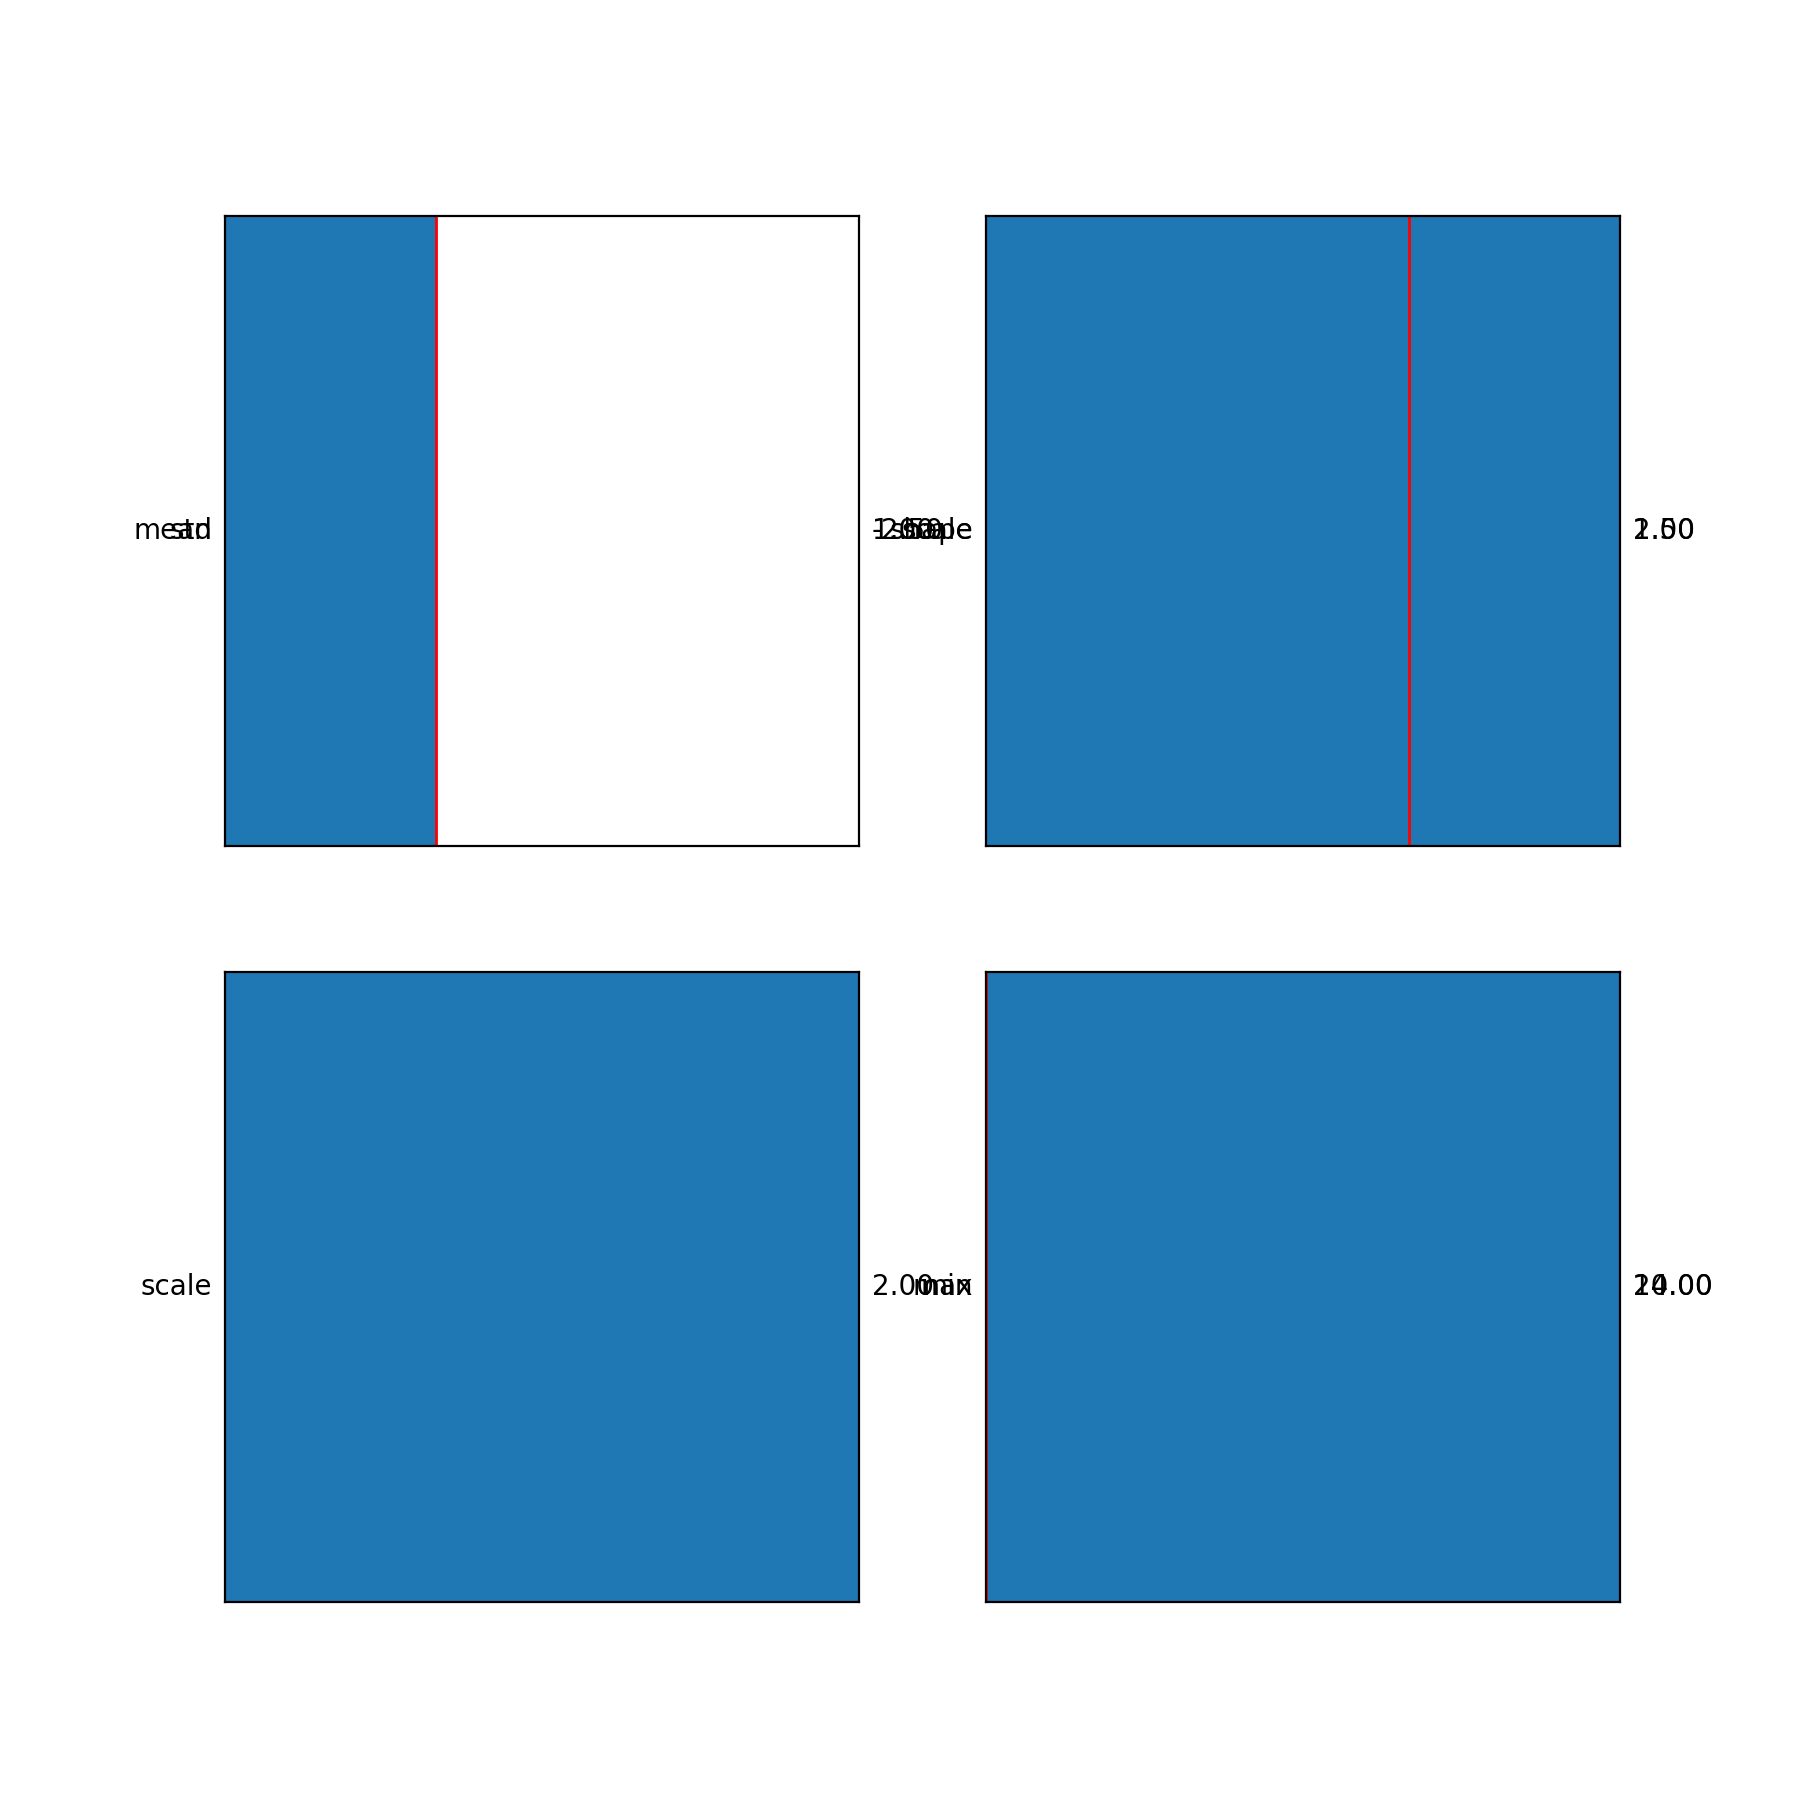

0

In [21]:
from matplotlib import widgets

fig = plt.figure(figsize=(9, 9))
axes = fig.subplots(2, 2)
axes = np.reshape(axes, -1)
ax1, ax2, ax3, ax4 = axes

normalMean, normalStd = -2.5, 1
gammaShape, gammaScale = 2, 1.5
expScale = 2
uniformMin, uniformMax = 14, 20

normalMeanSlider = widgets.Slider(ax1, 'mean', -5, 0, normalMean)
normalStdSlider = widgets.Slider(ax1, 'std', 0.5, 2, normalStd)
gammaShapeSlider = widgets.Slider(ax2, 'shape', 0.5, 2, gammaShape)
gammaScaleSlider = widgets.Slider(ax2, 'scale', 0.5, 2, gammaScale)
expScaleSlider = widgets.Slider(ax3, 'scale', 0.5, 2, expScale)
uniformMinSlider = widgets.Slider(ax4, 'min', 14, 20, uniformMin)
uniformMaxSlider = widgets.Slider(ax4, 'max', 14, 20, uniformMax)

normalMeanSlider.on_changed(lambda: update(100, ax1, x1, 'Normal', colors[0]))
normalStdSlider.on_changed(lambda: update(100, ax1, x1, 'Normal', colors[0]))
gammaShapeSlider.on_changed(lambda: update(100, ax2, x2, 'Gamma', colors[1]))
gammaScaleSlider.on_changed(lambda: update(100, ax2, x2, 'Gamma', colors[1]))
expScaleSlider.on_changed(lambda: update(100, ax3, x3, 'Exponential', colors[2]))
uniformMinSlider.on_changed(lambda: update(100, ax4, x4, 'Uniform', colors[3]))
uniformMaxSlider.on_changed(lambda: update(100, ax4, x4, 'Uniform', colors[3]))